## 1. Importing the Data:
The first step in data cleaning and preprocessing is importing the data. The data may come in various formats, such as CSV, Excel, SQL, or JSON. Once you have imported the data, you should explore it to understand its structure and content. You can use Python libraries like pandas and numpy to work with the data.


In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

In [3]:
# Load the dataset
file_path = "/content/drive/MyDrive/Menternship 2025/uber.csv"
data = pd.read_csv(file_path)

In [4]:
print(data.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [5]:
# Get the structure of the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


In [6]:
# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_columns = data.select_dtypes(include=['object']).columns  # Select categorical columns
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} unique values")
    print(f"Sample values: {data[column].unique()[:5]}")  # Display first 5 unique values


Unique values in categorical columns:
key: 200000 unique values
Sample values: ['2015-05-07 19:52:06.0000003' '2009-07-17 20:04:56.0000002'
 '2009-08-24 21:45:00.00000061' '2009-06-26 08:22:21.0000001'
 '2014-08-28 17:47:00.000000188']
pickup_datetime: 196629 unique values
Sample values: ['2015-05-07 19:52:06 UTC' '2009-07-17 20:04:56 UTC'
 '2009-08-24 21:45:00 UTC' '2009-06-26 08:22:21 UTC'
 '2014-08-28 17:47:00 UTC']


## Distribution of the target variable (fare amount):

Perform basic exploratory data analysis (EDA) techniques to understand the distribution of the target variable (fare amount) and identify any patterns or outliers.

In [7]:
# Get basic descriptive statistics of the target variable (fare_amount)
print(data['fare_amount'].describe())

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64


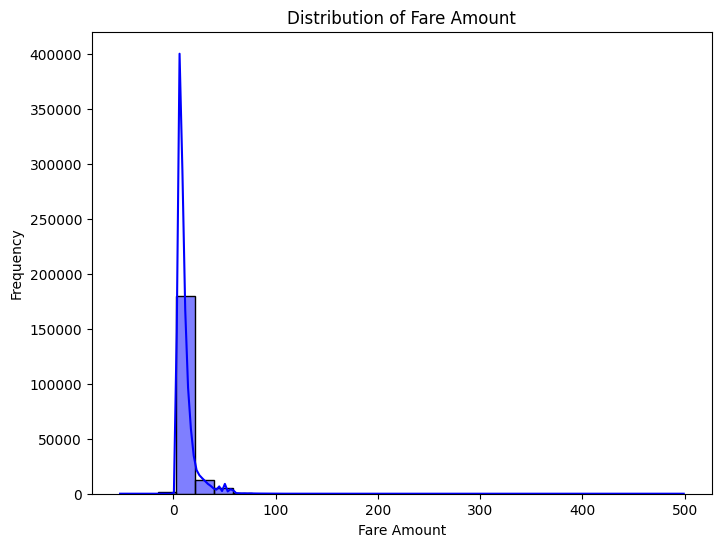

In [8]:
#Histogram: A histogram will help you see how the fares are distributed across different ranges.
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the target variable (fare_amount)
plt.figure(figsize=(8, 6))
sns.histplot(data['fare_amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


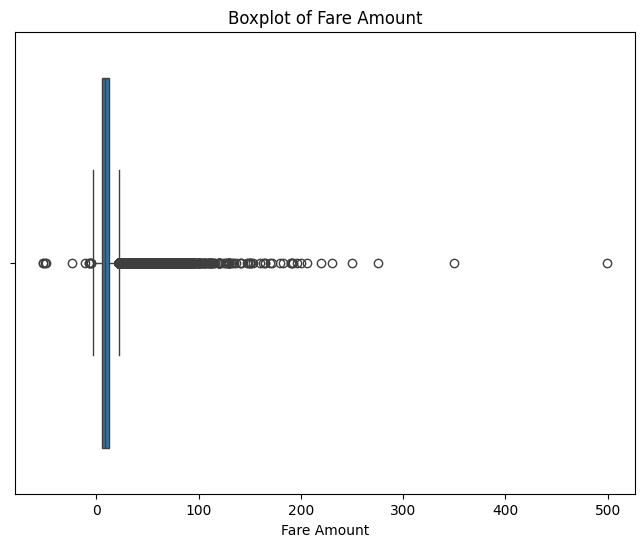

In [9]:
#Box Plot: A box plot can help you identify outliers in the fare_amount data.
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()



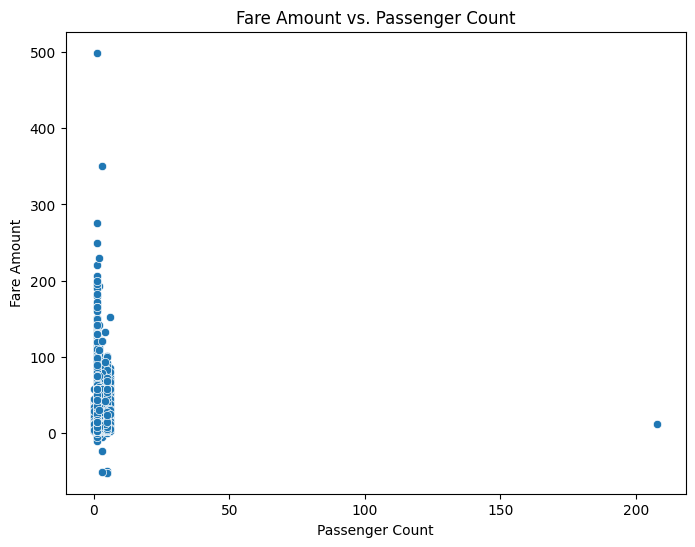

In [10]:
# Plot fare_amount against passenger count to see if there's a pattern
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['passenger_count'], y=data['fare_amount'])
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()


## 2. Handling Missing Data:

Missing data is a common issue in datasets. There are various ways to handle missing data, depending on the nature and extent of the missingness. Some common techniques include:

* Dropping rows or columns with missing values
* Imputing missing values with the mean, median, or mode of the column
* Imputing missing values with the most frequent value
* Imputing missing values with the value from the previous or next row (for time series data)

In [11]:
# Check for missing values in each column
print("\nMissing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values in each column:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [13]:
# Fill missing values without inplace
data['dropoff_longitude'] = data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean())
data['dropoff_latitude'] = data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean())

# Confirm no missing values remain
print("Missing values after filling:", data.isnull().sum())


Missing values after filling: Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


## 3. Feature Engineering:
Feature engineering plays a crucial role in enhancing the predictive power of your regression model. In this task, you will create new features based on domain knowledge and insights from the dataset.

For example, you can derive features like time of day (morning, afternoon, evening) or distance categories (short, medium, long).

A. From pickup_datetime column:

Hour of the Day: Can reveal time-based patterns in fare.

Day of the Week: Weekends or weekdays may influence demand.

Month or Year: Useful to identify seasonal patterns or yearly trends.

Part of the Day: Morning, afternoon, evening, night.

In [14]:
# Convert 'pickup_datetime' column to datetime objects
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Now you can extract parts of the pickup_datetime column
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year

# Define time of day categories
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['time_of_day'] = data['hour'].apply(categorize_time_of_day)


B. From pickup_latitude and pickup_longitude, and dropoff_latitude and dropoff_longitude:

Distance Between Pickup and Dropoff: Calculate the distance using the Haversine formula.

Categorize Distance: Based on the computed distance (short, medium, long).

In [15]:
# Calculate distance using the Haversine formula
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    radius = 6371  # Earth radius in kilometers
    return radius * c

# Add a distance column
data['distance_km'] = data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                       row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Categorize distance into 'short', 'medium', 'long'
def categorize_distance(distance):
    if distance < 2:
        return 'Short'
    elif 2 <= distance < 10:
        return 'Medium'
    else:
        return 'Long'

data['distance_category'] = data['distance_km'].apply(categorize_distance)


C. From passenger_count:

Group Size: Flag rides with a single passenger vs. group rides.

Outlier Handling: Handle extreme values of passengers (e.g., 0 or extremely large numbers).

In [16]:
# Flag single vs. group rides
data['is_group'] = data['passenger_count'].apply(lambda x: 1 if x > 1 else 0)

# Handle outliers: flag outlier passenger counts (e.g., 0 or > 6)
data['is_outlier_passenger_count'] = data['passenger_count'].apply(lambda x: 1 if x == 0 or x > 6 else 0)


D. From fare_amount (Target variable):

Fare per Kilometer: Calculate fare per km to understand cost efficiency.

In [17]:
# Calculate fare per km
data['fare_per_km'] = data['fare_amount'] / data['distance_km']

E. Interaction Features:

Time of Day and Distance: Explore interactions, for example, how fares change with time of day and distance.

In [18]:
# Interaction: time of day and distance
data['time_distance_interaction'] = data['time_of_day'] + "_" + data['distance_category']

In [19]:
# Verify New Features
print(data.head())
print(data.describe())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

            pickup_datetime  pickup_longitude  pickup_latitude  \
0 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day_of_week  \
0         -73.999512         40.723217                1    19            3   
1         -73.994710         40.750325                1    20            4   
2 

## 4. Split the Dataset:
To evaluate the performance of your regression model, you need to split the dataset into training and testing sets.

The training set will be used to train the regression model, while the testing set will be used to evaluate its performance on unseen data.

The typical split ratio is 70-30 or 80-20, but you can adjust it based on the size of your dataset.

In [20]:
# Importing the necessary module for splitting the data
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
# Features are all columns except the target variable 'fare_amount'
X = data.drop(columns=['fare_amount'])

# The target variable 'fare_amount' is the column we want to predict
y = data['fare_amount']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and 80% will be used for training
# random_state=42 ensures that the split is reproducible (i.e., results are the same each time the code is run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the size of the training and testing sets to verify the split
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Verifying the distribution of the target variable in both training and testing sets
print("\nTraining set target distribution:")
print(y_train.describe())

print("\nTesting set target distribution:")
print(y_test.describe())


Training set size: 160000
Testing set size: 40000

Training set target distribution:
count    160000.000000
mean         11.351493
std           9.796726
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         350.000000
Name: fare_amount, dtype: float64

Testing set target distribution:
count    40000.000000
mean        11.393804
std         10.311337
min         -6.900000
25%          6.000000
50%          8.500000
75%         12.500000
max        499.000000
Name: fare_amount, dtype: float64


## 5. Data Scaling/Normalization:
Regression models often benefit from scaling or normalization of the input features. In this task, you will apply a scaling or normalization technique to ensure that all features have a similar scale.

This step is important because it prevents features with large values from dominating the model's training process.

For this task, we can use Standardization or Min-Max Normalization, depending on the characteristics of the data.

1. Standardization (Z-score normalization):
Standardization transforms features so they have a mean of 0 and a standard deviation of 1. This is suitable when the data is normally distributed (bell-shaped curve).

2. Min-Max Normalization:
This technique rescales the features to a fixed range, typically 0 to 1. It’s useful when you want to bound the feature values within a specific range.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer

Standardization (Z-score Normalization):
Standardization is commonly used when features have varying units or different ranges.

In [22]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Defining features (X) and target (y)
# Exclude 'pickup_datetime' and other non-numerical columns from features
X = data.drop(columns=['fare_amount', 'pickup_datetime', 'time_of_day', 'distance_category', 'time_distance_interaction', 'key'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Check and Handle Problematic Values ---

# 1. Check and replace infinite values:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Impute missing values:
imputer = SimpleImputer(strategy='mean')  # Choose strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# --- Continue with Scaling ---

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the scaling
print("Training set after scaling (mean and std):")
print("Mean:", X_train_scaled.mean(axis=0))
print("Standard Deviation:", X_train_scaled.std(axis=0))

Training set after scaling (mean and std):
Mean: [ 4.64073224e-17  4.85389506e-16 -2.26174635e-16 -2.81952239e-16
 -1.41664458e-17 -6.06847905e-17 -2.52020627e-17  3.71702669e-17
 -1.33582034e-16 -2.64607003e-14  1.09467990e-17  4.38760139e-17
 -2.78888024e-17 -3.77475828e-18]
Standard Deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Min-Max Normalization:
Min-Max normalization is used when you want to rescale the data to a fixed range (typically between 0 and 1).

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Import MinMaxScaler
import numpy as np
from sklearn.impute import SimpleImputer
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

# Verify the scaling by checking the range of values in the training set
print("Training set after normalization (min and max):")
print("Min:", X_train_scaled.min(axis=0))
print("Max:", X_train_scaled.max(axis=0))


Training set after normalization (min and max):
Min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


 Verify the Scaling/Normalization:

It’s important to check if the scaling is successful and ensures similar scales for all features.

For Standardization, the features should have a mean of 0 and a standard deviation of 1.

For Min-Max Normalization, the features should be scaled between 0 and 1.

In [24]:
# Verify the transformed data
import pandas as pd

# Convert the scaled data back to DataFrame to check the results
scaled_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display first few rows of scaled data
print("\nScaled Training Data (first few rows):")
print(scaled_train_df.head())

print("\nScaled Test Data (first few rows):")
print(scaled_test_df.head())



Scaled Training Data (first few rows):
   Unnamed: 0  pickup_longitude  pickup_latitude  dropoff_longitude  \
0    0.320778          0.906015         0.066784           0.727830   
1    0.980353          0.906015         0.066786           0.727845   
2    0.213188          0.906004         0.066786           0.727825   
3    0.518458          0.906034         0.066801           0.727835   
4    0.983023          0.906008         0.066777           0.727874   

   dropoff_latitude  passenger_count      hour  day_of_week     month  \
0          0.525890         0.004808  0.913043     0.500000  0.909091   
1          0.525941         0.004808  0.956522     0.333333  0.090909   
2          0.525877         0.004808  0.347826     1.000000  0.454545   
3          0.525886         0.009615  1.000000     0.833333  0.545455   
4          0.525810         0.004808  0.565217     1.000000  0.727273   

       year  distance_km  is_group  is_outlier_passenger_count  fare_per_km  
0  0.000000     

## 6. Correlation Analysis:
Understanding the relationships between features and the target variable can provide valuable insights.

In this task, you will perform correlation analysis to identify the strength and direction of relationships between the features and the fare amount.

This analysis will help you identify the most influential features and guide your feature selection process.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Convert the scaled data back to a DataFrame with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Add the target variable 'fare_amount' to the DataFrame
X_train_scaled_df['fare_amount'] = y_train

# Compute the Pearson correlation matrix
corr = X_train_scaled_df.corr()

# Display the correlation matrix
print(corr)


                            Unnamed: 0  pickup_longitude  pickup_latitude  \
Unnamed: 0                    1.000000          0.001507        -0.001590   
pickup_longitude              0.001507          1.000000        -0.800103   
pickup_latitude              -0.001590         -0.800103         1.000000   
dropoff_longitude             0.001042          0.830801        -0.758015   
dropoff_latitude             -0.001185         -0.849639         0.671587   
passenger_count               0.002683         -0.001232        -0.001532   
hour                          0.000300          0.002742        -0.004556   
day_of_week                  -0.005096         -0.000657        -0.001288   
month                         0.000836         -0.004101         0.004087   
year                         -0.002504          0.010535        -0.010775   
distance_km                  -0.000183          0.098200        -0.049885   
is_group                      0.004009         -0.000608        -0.001078   

Visualize the Correlation Matrix Using a Heatmap:
A heatmap provides a clear visual representation of the correlation between variables.

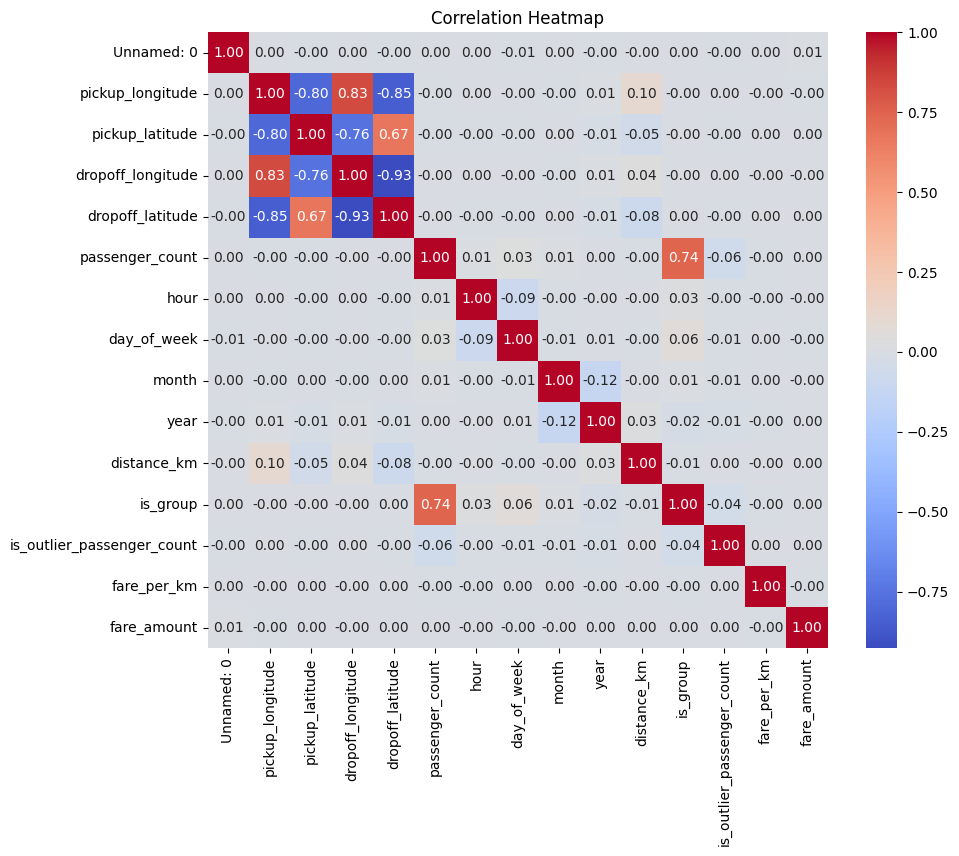

In [28]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



## 7. Handling Outliers:
Outliers are extreme values that deviate from the normal range of values in a dataset. Outliers can distort the results of data analysis, and should be identified and treated accordingly. Some common techniques to handle outliers include:
* Visual inspection of the data to identify outliers
* Using statistical methods like z-score or IQR (Interquartile Range) to identify outliers
* Replacing outliers with the mean, median, or mode of the column
* Removing outliers from the dataset

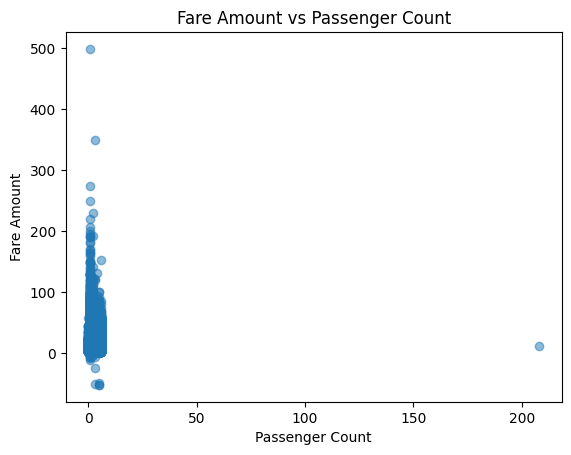

In [29]:
import matplotlib.pyplot as plt

# Example: Scatter plot between fare_amount and passenger_count
plt.scatter(data['passenger_count'], data['fare_amount'], alpha=0.5)
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.show()

# Repeat for other features (e.g., pickup_datetime or distance)


In [30]:
# Compute correlation matrix for numerical features only
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Extract correlation of features with the target variable
target_corr = correlation_matrix['fare_amount']

# Display correlations
print(target_corr)


Unnamed: 0                    0.000589
fare_amount                   1.000000
pickup_longitude              0.010457
pickup_latitude              -0.008481
dropoff_longitude             0.008986
dropoff_latitude             -0.011014
passenger_count               0.010150
hour                         -0.021473
day_of_week                   0.007501
month                         0.023814
year                          0.118335
distance_km                   0.024686
is_group                      0.017550
is_outlier_passenger_count   -0.011434
fare_per_km                   0.122902
Name: fare_amount, dtype: float64


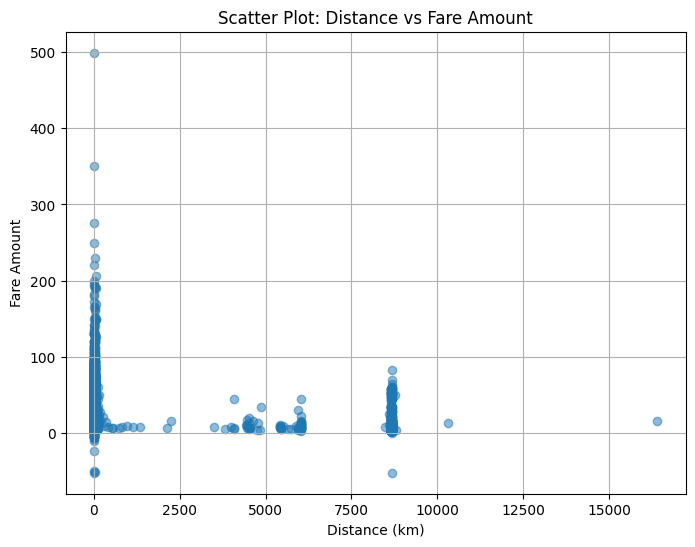

In [31]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['distance_km'], data['fare_amount'], alpha=0.5)
plt.title("Scatter Plot: Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()


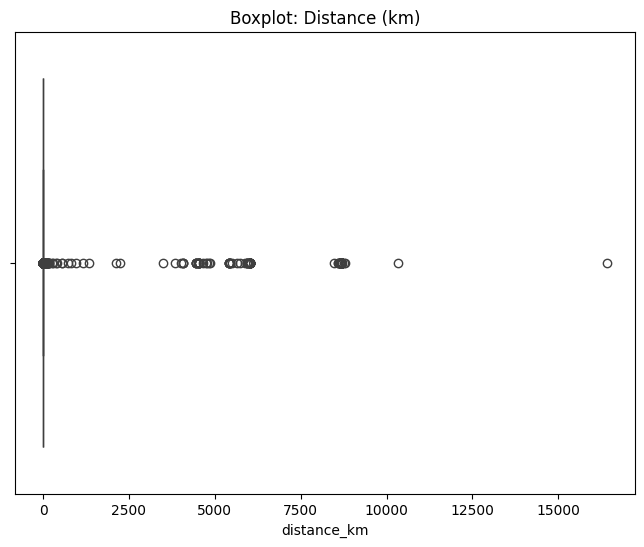

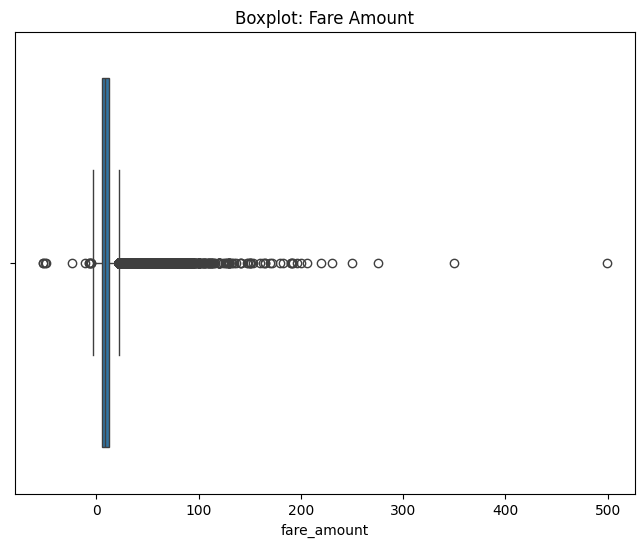

In [32]:
import seaborn as sns

# Boxplot for distance
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['distance_km'])
plt.title("Boxplot: Distance (km)")
plt.show()

# Boxplot for fare amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['fare_amount'])
plt.title("Boxplot: Fare Amount")
plt.show()


In [33]:
# Calculate IQR
Q1 = data['distance_km'].quantile(0.25)
Q3 = data['distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Distance lower bound: {lower_bound}, upper bound: {upper_bound}")

# Filter out outliers
outliers = data[(data['distance_km'] < lower_bound) | (data['distance_km'] > upper_bound)]
print(f"Number of outliers in distance: {len(outliers)}")

# Optionally remove outliers
data_no_outliers = data[(data['distance_km'] >= lower_bound) & (data['distance_km'] <= upper_bound)]


Distance lower bound: -2.774815358235191, upper bound: 7.865285588261797
Number of outliers in distance: 16754


In [34]:
# Calculate IQR
Q1_fare = data['fare_amount'].quantile(0.25)
Q3_fare = data['fare_amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Define bounds
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print(f"Fare lower bound: {lower_bound_fare}, upper bound: {upper_bound_fare}")

# Filter out outliers
outliers_fare = data[(data['fare_amount'] < lower_bound_fare) | (data['fare_amount'] > upper_bound_fare)]
print(f"Number of outliers in fare: {len(outliers_fare)}")

# Optionally remove outliers
data_no_outliers_fare = data[(data['fare_amount'] >= lower_bound_fare) & (data['fare_amount'] <= upper_bound_fare)]


Fare lower bound: -3.75, upper bound: 22.25
Number of outliers in fare: 17167


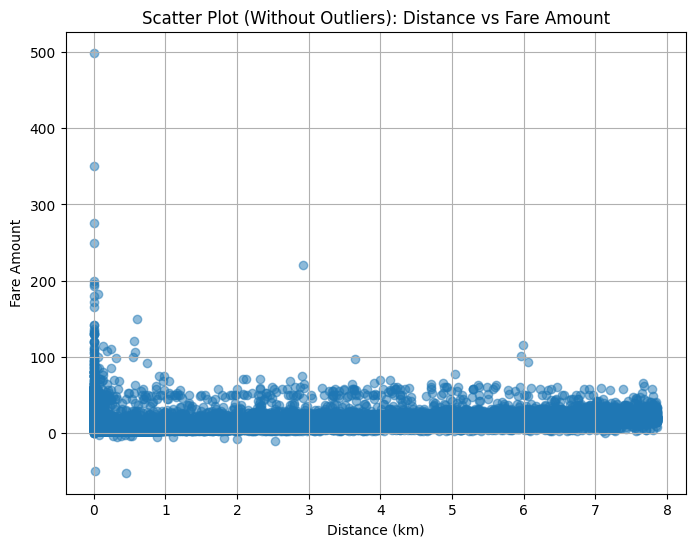

In [35]:
# Scatter plot without outliers
plt.figure(figsize=(8, 6))
plt.scatter(data_no_outliers['distance_km'], data_no_outliers['fare_amount'], alpha=0.5)
plt.title("Scatter Plot (Without Outliers): Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()


In [36]:
# Correlation before outlier removal
original_corr = data['distance_km'].corr(data['fare_amount'])

# Correlation after outlier removal
updated_corr = data_no_outliers['distance_km'].corr(data_no_outliers['fare_amount'])

print(f"Correlation before outlier removal: {original_corr}")
print(f"Correlation after outlier removal: {updated_corr}")


Correlation before outlier removal: 0.024686457299917388
Correlation after outlier removal: 0.5553277555806779


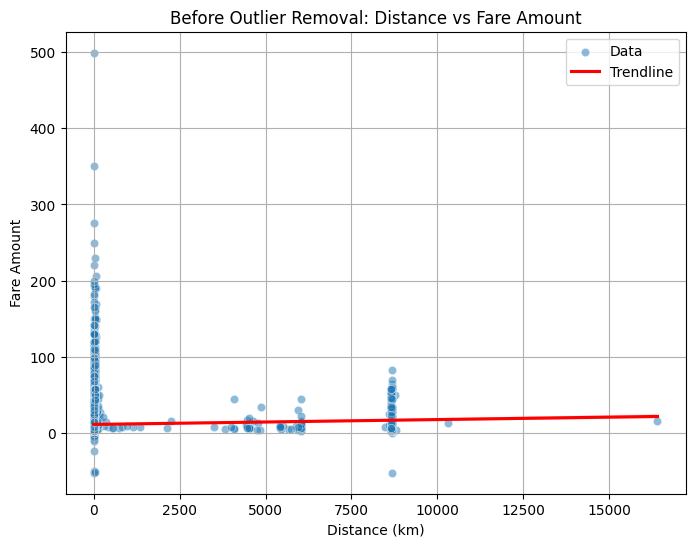

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot before outlier removal
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['distance_km'], y=data['fare_amount'], alpha=0.5, label='Data')
sns.regplot(x=data['distance_km'], y=data['fare_amount'], scatter=False, color='red', label='Trendline')
plt.title("Before Outlier Removal: Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.legend()
plt.grid(True)
plt.show()


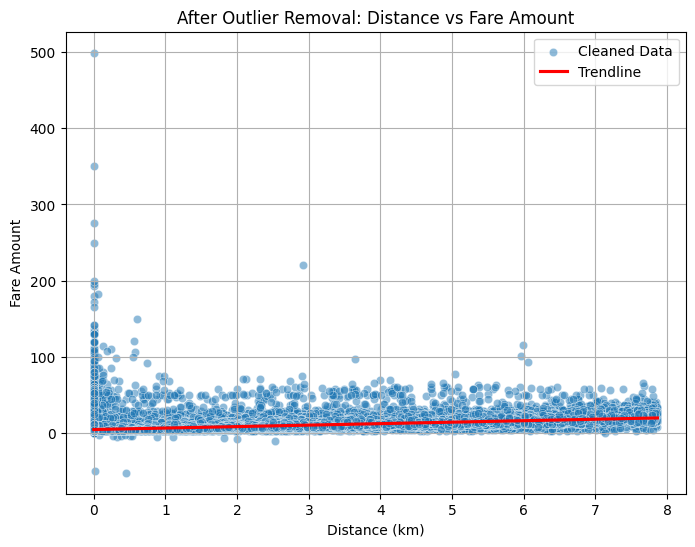

In [38]:
# Scatter plot after outlier removal
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_no_outliers['distance_km'], y=data_no_outliers['fare_amount'], alpha=0.5, label='Cleaned Data')
sns.regplot(x=data_no_outliers['distance_km'], y=data_no_outliers['fare_amount'], scatter=False, color='red', label='Trendline')
plt.title("After Outlier Removal: Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Add a file name to the path
data_no_outliers.to_csv('/content/drive/MyDrive/Menternship 2025/uber_cleaned.csv', index=False)